# Part 1. Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
# Download the data and load it as numpy arrays
lfw_people = fetch_lfw_people(data_home='../../data/faces/',
                              min_faces_per_person=70, resize=0.4)

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_features: 1850
n_classes: 7


In [3]:
for i, count in enumerate(np.bincount(y)):
    print(f'{count} photos of {target_names[i]}' )

77 photos of Ariel Sharon
236 photos of Colin Powell
121 photos of Donald Rumsfeld
530 photos of George W Bush
109 photos of Gerhard Schroeder
71 photos of Hugo Chavez
144 photos of Tony Blair


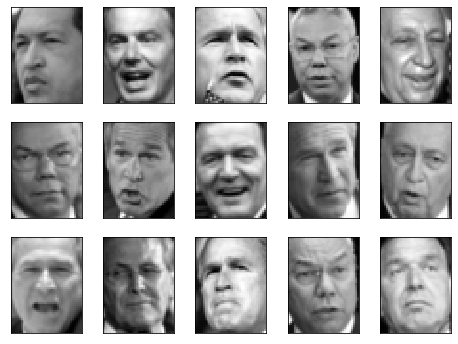

In [4]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='gray')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [6]:
svc = SVC(class_weight='balanced', gamma=0.01, random_state=17)

In [7]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=17, shrinking=True, tol=0.001,
    verbose=False)

In [8]:
accuracy_score(svc.predict(X_test),y_test)

0.18604651162790697

In [9]:
list = [50,100,150,200]
def find_n_comp(list, X, y):
    scores = []
    for i in list:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
        pca = PCA(whiten=True, n_components=i)
        pca_features_train = pca.fit_transform(X_train)
        pca_features_test = pca.transform(X_test)
        svc = SVC(class_weight='balanced', gamma=0.01, random_state=17)
        svc.fit(pca_features_train, y_train)
        prediction = svc.predict(pca_features_test)
        scores.append(accuracy_score(prediction,y_test))
    return scores

In [10]:
find_n_comp(list, X, y)

[0.7829457364341085,
 0.8217054263565892,
 0.7390180878552972,
 0.5762273901808785]

# 1. 100 PCA components maximizes SVM accuracy

# 2. Each instance is attributed to a closest centroid

In [11]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [12]:
plt.figure(figsize=(16,6))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')

In [13]:
pca = PCA()
X_reduced = pca.fit_transform(X)
print('Projecting %d-dimensional data to 2D' % X.shape[1])
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

Projecting 64-dimensional data to 2D


In [14]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

CPU times: user 14.8 s, sys: 464 ms, total: 15.2 s
Wall time: 15.7 s


In [ ]:
def moving_average(series, n):
    return np.average(series[-n:])
moving_average([200,600,500,100], 3)

# Part 2. Time Series

## 6. Daily temperature in moscow for twenty years & GPS-coordinates of someone's current trajectory

## 7. Trend, Seasonality, Noise, and Cyclical are components of a time series

## 8. 400

In [16]:
from fbprophet import Prophet

In [17]:
df = pd.read_csv('../../mlcourse.ai/data/FB_data.csv')

In [18]:
df

date    open      high     low     close    volume Name
0     2013-02-08   28.89   29.1700   28.51   28.5450  37662614   FB
1     2013-02-11   28.61   28.6800   28.04   28.2600  36979533   FB
2     2013-02-12   27.67   28.1600   27.10   27.3700  93417215   FB
3     2013-02-13   27.36   28.3200   27.31   27.9075  50100805   FB
4     2013-02-14   28.02   28.6300   28.01   28.5000  35581045   FB
...          ...     ...       ...     ...       ...       ...  ...
1254  2018-02-01  188.22  195.3200  187.89  193.0900  54211293   FB
1255  2018-02-02  192.04  194.2100  189.98  190.2800  26677484   FB
1256  2018-02-05  186.93  190.6100  180.61  181.2600  33128206   FB
1257  2018-02-06  178.57  185.7700  177.74  185.3100  37758505   FB
1258  2018-02-07  184.15  185.0817  179.95  180.1800  27601886   FB

[1259 rows x 7 columns]

In [19]:
df = df[['date','close']].reset_index(drop=True)

In [20]:
df

date     close
0     2013-02-08   28.5450
1     2013-02-11   28.2600
2     2013-02-12   27.3700
3     2013-02-13   27.9075
4     2013-02-14   28.5000
...          ...       ...
1254  2018-02-01  193.0900
1255  2018-02-02  190.2800
1256  2018-02-05  181.2600
1257  2018-02-06  185.3100
1258  2018-02-07  180.1800

[1259 rows x 2 columns]

In [21]:
df = df.rename({'close':'y','date':'ds'}, axis='columns')

In [22]:
df['ds'] = pd.to_datetime(df['ds'])
df

ds         y
0    2013-02-08   28.5450
1    2013-02-11   28.2600
2    2013-02-12   27.3700
3    2013-02-13   27.9075
4    2013-02-14   28.5000
...         ...       ...
1254 2018-02-01  193.0900
1255 2018-02-02  190.2800
1256 2018-02-05  181.2600
1257 2018-02-06  185.3100
1258 2018-02-07  180.1800

[1259 rows x 2 columns]

In [23]:
df_train = df.query('ds < datetime(2017, 9, 1)')

In [24]:
df_test = df.query('ds >= datetime(2017, 9, 1)')

In [25]:
prophet = Prophet()

In [26]:
prophet.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
# prediction = prophet.predict(df_test)
future = prophet.make_future_dataframe(periods=109)
forecast = prophet.predict(future)

In [28]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
# mean_absolute_percentage_error(future.ds,df_test.ds)
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [30]:
prediction = make_comparison_dataframe(future, forecast)

In [31]:
mean_absolute_percentage_error(df.y.values,prediction.yhat.values)

3.0618333325490554

In [32]:
pht = Prophet()

In [35]:
pht.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
pred = pht.predict(df_test)

In [47]:
mean_absolute_percentage_error(df_test.y.values, pred.yhat.values)

2.5014708684453413

## 9. 2.5